In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from utils import *

2024-01-23 06:35:50.092642: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 06:35:50.092692: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 06:35:50.092713: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 06:35:50.098449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
md_lstm = keras.models.load_model('./models/new_LSTMAE/new_LSTMAE')
md_gru = keras.models.load_model('./models/new_GRUAE/new_GRUAE')
md_tcn = keras.models.load_model('./models/new_TCNAE/new_TCNAE')

2024-01-23 06:36:02.564480: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-23 06:36:02.591819: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-23 06:36:02.591864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-23 06:36:02.595044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-23 06:36:02.595104: I tensorflow/compile

In [3]:
df = pd.read_csv('./dataset/anomaly_dataset.csv').set_index('timestamp')
max_val = np.max(df.values)

seq_data = create_sequences(df, seq_len=24)
seq_data /= max_val

train = seq_data[:(365 * 24 * 3)]
val = seq_data[(365 * 24 * 3):(365 * 24 * 4)]
test = seq_data[(365 * 24 * 4):]

In [4]:
len(train), len(val), len(test)

(26280, 8760, 3601)

In [5]:
trlpred = md_lstm.predict(train)
trgpred = md_gru.predict(train)
trtpred = md_tcn.predict(train)

  7/822 [..............................] - ETA: 17s

2024-01-23 06:37:13.143389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600


822/822 [==============================] - 3s 3ms/step


In [6]:
valpred = md_lstm.predict(val)
vagpred = md_gru.predict(val)
vatpred = md_tcn.predict(val)

274/274 [==============================] - 1s 3ms/step


In [7]:
telpred = md_lstm.predict(test)
tegpred = md_gru.predict(test)
tetpred = md_tcn.predict(test)

113/113 [==============================] - 0s 4ms/step


In [12]:
mse = np.mean(keras.losses.mean_squared_error(train, trlpred))
mae = np.mean(keras.losses.mean_absolute_error(train, trlpred))
print(f'LSTM mse(train): {mse}')
print(f'LSTM mae(train): {mae}')
print()
mse = np.mean(keras.losses.mean_squared_error(train, trgpred))
mae = np.mean(keras.losses.mean_absolute_error(train, trgpred))
print(f'GRU mse(train): {mse}')
print(f'GRU mae(train): {mae}')
print()
mse = np.mean(keras.losses.mean_squared_error(train, trtpred))
mae = np.mean(keras.losses.mean_absolute_error(train, trtpred))
print(f'TCN mse(train): {mse}')
print(f'TCN mae(train): {mae}')

LSTM mse(train): 8.961317507782951e-05
LSTM mae(train): 0.00632303673774004

GRU mse(train): 9.127974772127345e-05
GRU mae(train): 0.0063366033136844635

TCN mse(train): 2.1472278604051098e-05
TCN mae(train): 0.003554080380126834


In [13]:
mse = np.mean(keras.losses.mean_squared_error(val, valpred))
mae = np.mean(keras.losses.mean_absolute_error(val, valpred))
print(f'LSTM mse(val): {mse}')
print(f'LSTM mae(val): {mae}')
print()
mse = np.mean(keras.losses.mean_squared_error(val, vagpred))
mae = np.mean(keras.losses.mean_absolute_error(val, vagpred))
print(f'GRU mse(val): {mse}')
print(f'GRU mae(val): {mae}')
print()
mse = np.mean(keras.losses.mean_squared_error(val, vatpred))
mae = np.mean(keras.losses.mean_absolute_error(val, vatpred))
print(f'TCN mse(val): {mse}')
print(f'TCN mae(val): {mae}')

LSTM mse(val): 9.785444126464427e-05
LSTM mae(val): 0.0066010309383273125

GRU mse(val): 9.911286178976297e-05
GRU mae(val): 0.006614473648369312

TCN mse(val): 2.3233746105688624e-05
TCN mae(val): 0.0036934837698936462


In [14]:
mse = np.mean(keras.losses.mean_squared_error(test, telpred))
mae = np.mean(keras.losses.mean_absolute_error(test, telpred))
print(f'LSTM mse(test): {mse}')
print(f'LSTM mae(test): {mae}')
print()
mse = np.mean(keras.losses.mean_squared_error(test, tegpred))
mae = np.mean(keras.losses.mean_absolute_error(test, tegpred))
print(f'GRU mse(test): {mse}')
print(f'GRU mae(test): {mae}')
print()
mse = np.mean(keras.losses.mean_squared_error(test, tetpred))
mae = np.mean(keras.losses.mean_absolute_error(test, tetpred))
print(f'TCN mse(test): {mse}')
print(f'TCN mae(test): {mae}')

LSTM mse(test): 7.11627071723342e-05
LSTM mae(test): 0.005745204631239176

GRU mse(test): 7.682351861149073e-05
GRU mae(test): 0.005899982992559671

TCN mse(test): 1.8509201254346408e-05
TCN mae(test): 0.0034300682600587606


In [16]:
with open('./models/new_LSTMAE/new_LSTMAE_hist.pkl', 'rb') as f:
    lstmae_h = pickle.load(f)

with open('./models/new_GRUAE/new_GRUAE_hist.pkl', 'rb') as f:
    gruae_h = pickle.load(f)

with open('./models/new_TCNAE/new_TCNAE_hist.pkl', 'rb') as f:
    tcnae_h = pickle.load(f)

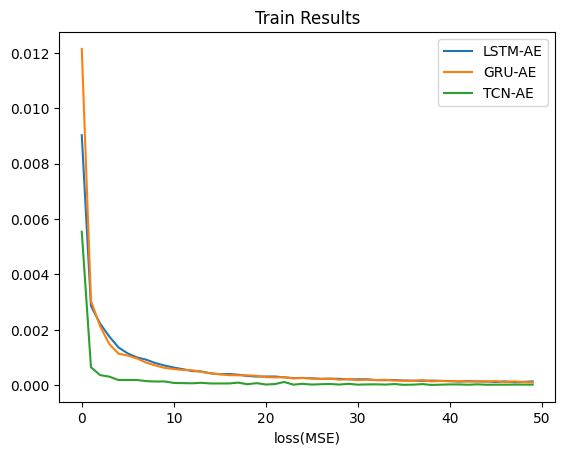

In [17]:
plt.title('Train Results')
plt.plot(lstmae_h['loss'], label='LSTM-AE')
plt.plot(gruae_h['loss'], label='GRU-AE')
plt.plot(tcnae_h['loss'], label='TCN-AE')
plt.xlabel('epoch')
plt.xlabel('loss(MSE)')
plt.legend()
plt.show()

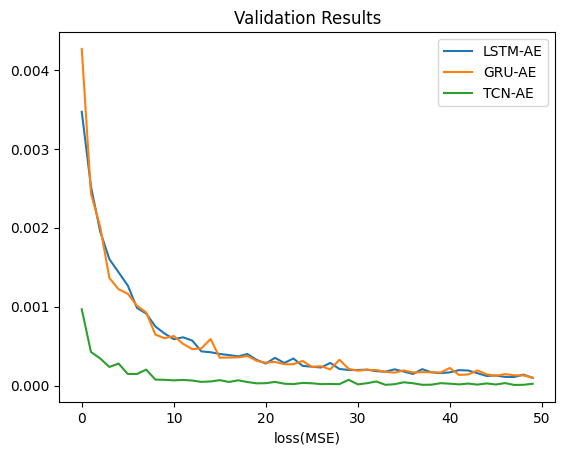

In [18]:
plt.title('Validation Results')
plt.plot(lstmae_h['val_loss'], label='LSTM-AE')
plt.plot(gruae_h['val_loss'], label='GRU-AE')
plt.plot(tcnae_h['val_loss'], label='TCN-AE')
plt.xlabel('epoch')
plt.xlabel('loss(MSE)')
plt.legend()
plt.show()

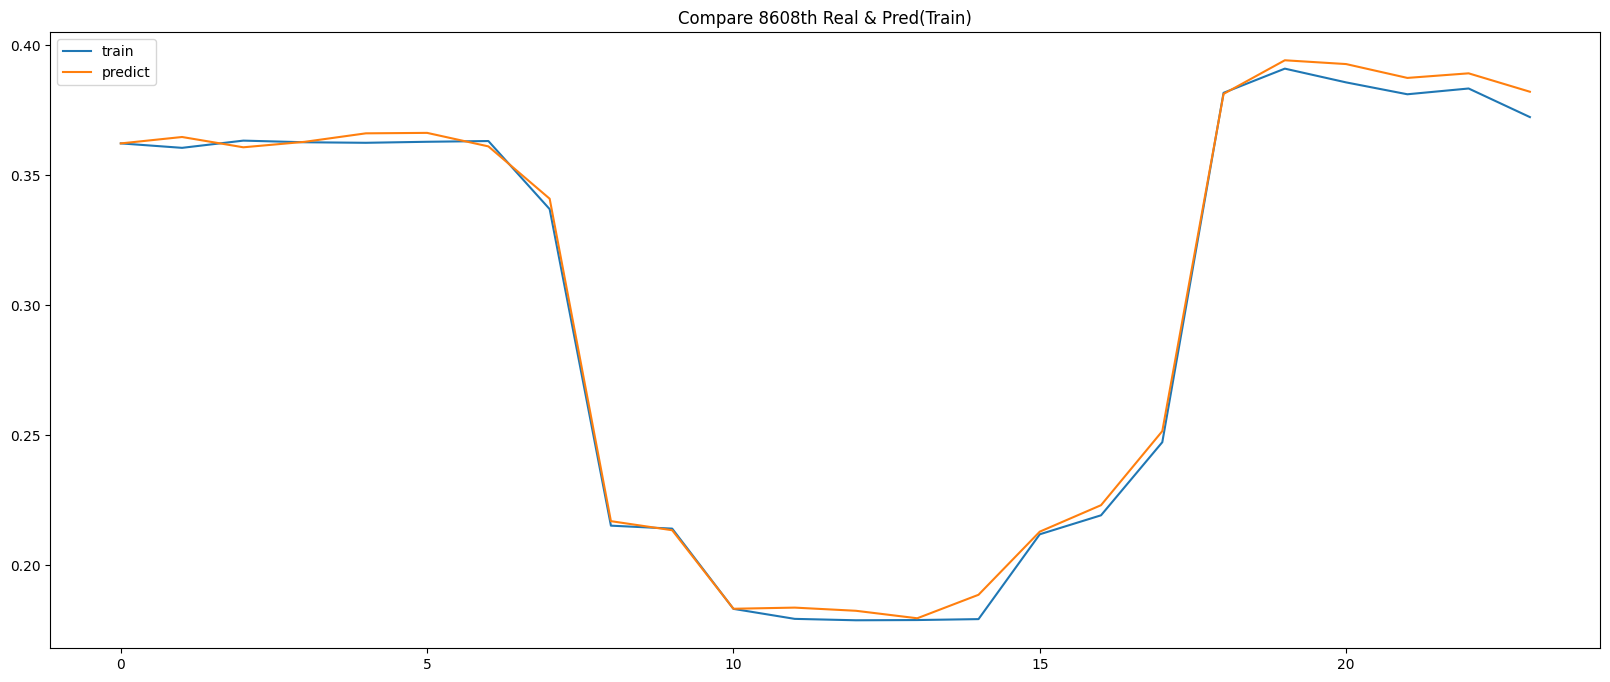

In [47]:
# model = lstm
import random

plt.figure(figsize=(20, 8))
num = random.randint(0, len(train))

plt.title(f'Compare {num}th Real & Pred(Train)')
plt.plot(train[num], label='train')
plt.plot(trtpred[num], label='predict')
plt.legend()
plt.show()

In [68]:
df.iloc[(365 * 24 * 4):]

,use
timestamp,
2021-01-01 01:00:00,146.350926
2021-01-01 02:00:00,145.756449
2021-01-01 03:00:00,146.070271
2021-01-01 04:00:00,145.775903
2021-01-01 05:00:00,145.865279
...,...
2021-05-31 20:00:00,92.315419
2021-05-31 21:00:00,91.397286
2021-05-31 22:00:00,90.623291


In [80]:
np.sum((anoms))

3

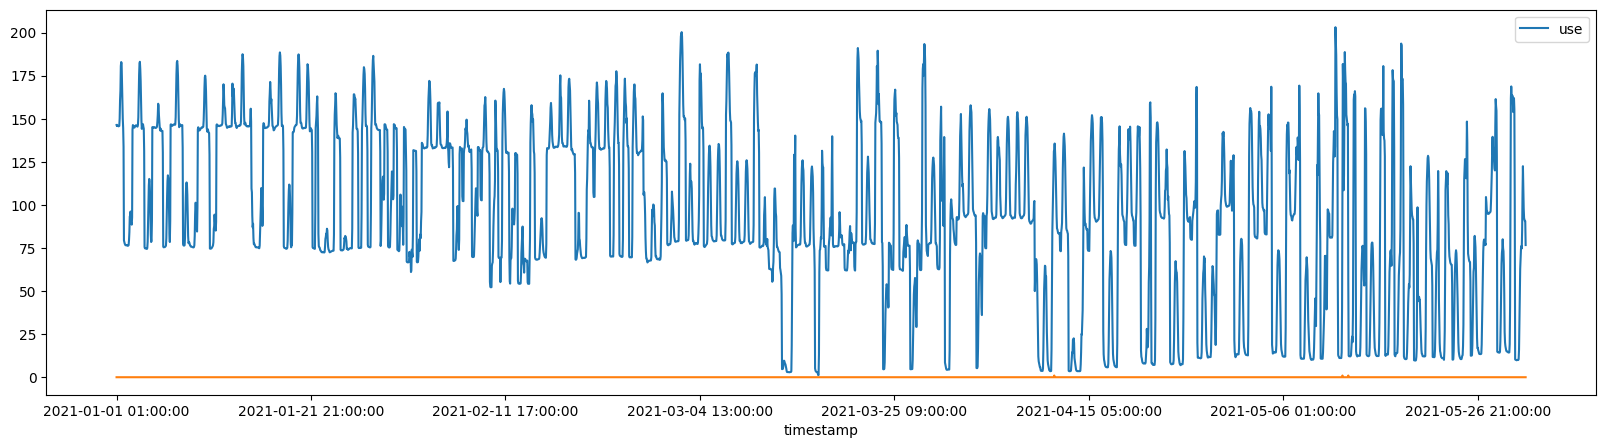

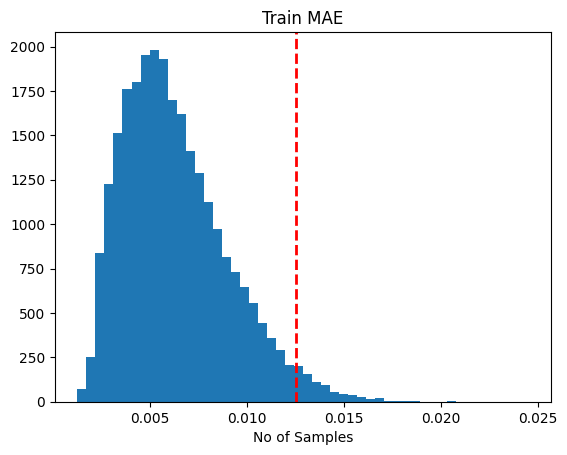

In [85]:
tr_mae = np.mean(keras.losses.mean_absolute_error(train, trlpred), axis=1)
plt.hist(tr_mae, bins=50)
plt.title('Train MAE')
plt.xlabel('No of Samples')
plt.axvline(.0125, color='red', linestyle='--', linewidth=2)
plt.show()

Threshold: 0.02448558807373047


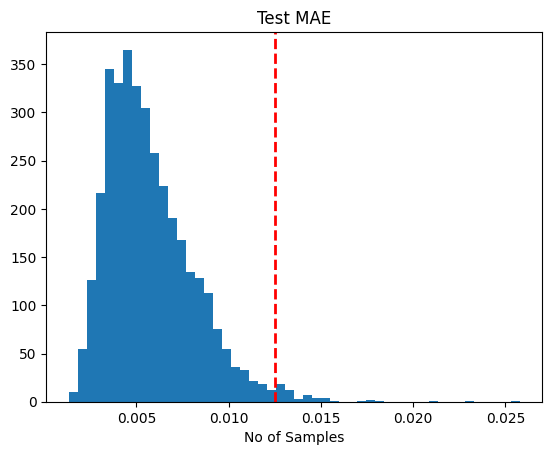

In [86]:
threshold = np.max(tr_mae)
print(f'Threshold: {threshold}')

te_mae = np.mean(keras.losses.mean_absolute_error(test, telpred), axis=1)
plt.hist(te_mae, bins=50)
plt.title('Test MAE')
plt.xlabel('No of Samples')
plt.axvline(.0125, color='red', linestyle='--', linewidth=2)
plt.show()

In [87]:
threshold = 0.0125

In [88]:
anoms = []
test_ls = keras.losses.mean_absolute_error(test, tetpred)

for i in range(keras.losses.mean_absolute_error(test, tetpred).shape[0]):
    if i ==0:
        for value in test_ls[i]:
            if value > threshold:
                anoms.append(1)
            else:
                anoms.append(0)
    else:
        value = test_ls[i][-1]
        if value > threshold:
                anoms.append(1)
        else:
            anoms.append(0)

In [96]:
print(f'Num of Anomal datas: {np.sum((anoms))}')
anomss = pd.DataFrame(anoms)

Num of Anomal datas: 42


In [104]:
anom_idx = anomss[anomss[0]==1].index

In [134]:
ttt = df_test.drop('anom', axis=1)
ttt.reset_index(inplace=True)

In [136]:
ttt['anom'] = 0

In [140]:
ttt.reset_index(inplace=True)

In [137]:
ttt

,timestamp,use,anom
0,2021-01-01 01:00:00,146.350926,0
1,2021-01-01 02:00:00,145.756449,0
2,2021-01-01 03:00:00,146.070271,0
3,2021-01-01 04:00:00,145.775903,0
4,2021-01-01 05:00:00,145.865279,0
...,...,...,...
3619,2021-05-31 20:00:00,92.315419,0
3620,2021-05-31 21:00:00,91.397286,0
3621,2021-05-31 22:00:00,90.623291,0
3622,2021-05-31 23:00:00,90.582110,0


In [144]:
list(anom_idx)

[20,
 21,
 519,
 963,
 1454,
 1466,
 1744,
 1957,
 1986,
 1987,
 2217,
 2411,
 2412,
 2459,
 2580,
 2581,
 2649,
 2653,
 2675,
 2748,
 2749,
 2750,
 2751,
 2844,
 3112,
 3119,
 3134,
 3152,
 3167,
 3179,
 3180,
 3273,
 3297,
 3348,
 3373,
 3374,
 3422,
 3423,
 3469,
 3471,
 3607,
 3608]

In [146]:
ttt

,index,timestamp,use,anom
0,0,2021-01-01 01:00:00,146.350926,0
1,1,2021-01-01 02:00:00,145.756449,0
2,2,2021-01-01 03:00:00,146.070271,0
3,3,2021-01-01 04:00:00,145.775903,0
4,4,2021-01-01 05:00:00,145.865279,0
...,...,...,...,...
3619,3619,2021-05-31 20:00:00,92.315419,0
3620,3620,2021-05-31 21:00:00,91.397286,0
3621,3621,2021-05-31 22:00:00,90.623291,0
3622,3622,2021-05-31 23:00:00,90.582110,0


In [151]:
lst = []
for value in ttt['index']:
    if value in list(anom_idx):
        lst.append(1)
    else:
        lst.append(0)

In [153]:
ttt['anom'] = lst

In [157]:
ttt['anom'].sum()

42

In [159]:
ttt

,index,timestamp,use,anom
0,0,2021-01-01 01:00:00,146.350926,0
1,1,2021-01-01 02:00:00,145.756449,0
2,2,2021-01-01 03:00:00,146.070271,0
3,3,2021-01-01 04:00:00,145.775903,0
4,4,2021-01-01 05:00:00,145.865279,0
...,...,...,...,...
3619,3619,2021-05-31 20:00:00,92.315419,0
3620,3620,2021-05-31 21:00:00,91.397286,0
3621,3621,2021-05-31 22:00:00,90.623291,0
3622,3622,2021-05-31 23:00:00,90.582110,0


In [164]:
ttt['timestamp']

0       2021-01-01 01:00:00
1       2021-01-01 02:00:00
2       2021-01-01 03:00:00
3       2021-01-01 04:00:00
4       2021-01-01 05:00:00
               ...         
3619    2021-05-31 20:00:00
3620    2021-05-31 21:00:00
3621    2021-05-31 22:00:00
3622    2021-05-31 23:00:00
3623    2021-06-01 00:00:00
Name: timestamp, Length: 3624, dtype: object

In [166]:
ttt.set_index('timestamp')

,index,use,anom
timestamp,,,
2021-01-01 01:00:00,0,146.350926,0
2021-01-01 02:00:00,1,145.756449,0
2021-01-01 03:00:00,2,146.070271,0
2021-01-01 04:00:00,3,145.775903,0
2021-01-01 05:00:00,4,145.865279,0
...,...,...,...
2021-05-31 20:00:00,3619,92.315419,0
2021-05-31 21:00:00,3620,91.397286,0
2021-05-31 22:00:00,3621,90.623291,0


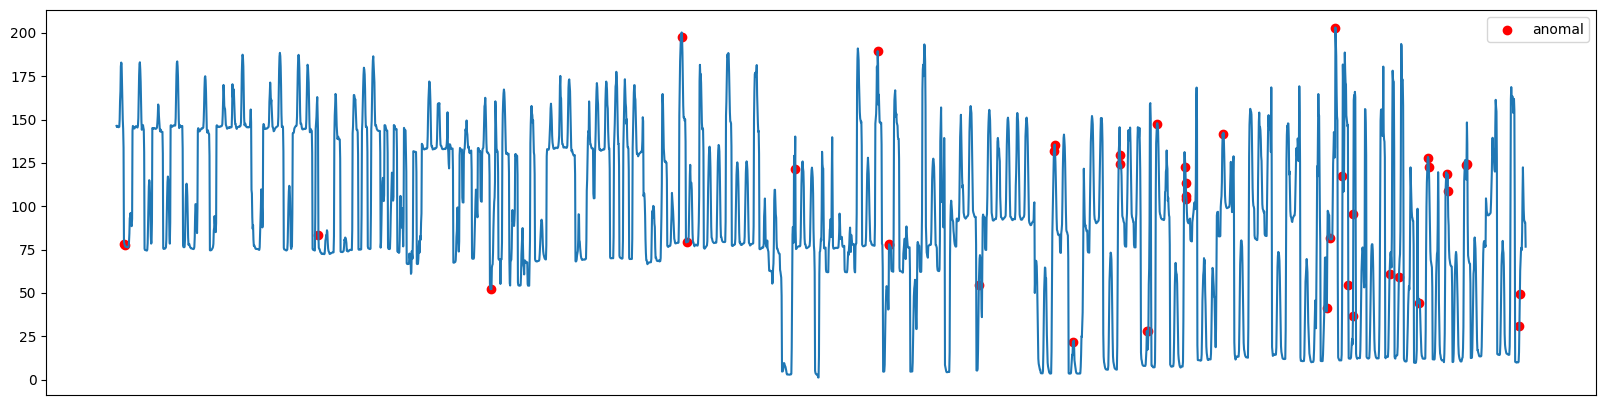

In [172]:
import seaborn as sns
x = ttt['timestamp']
y = ttt['use']
# ttt.set_index('timestamp').plot(figsize=(20,5), legend=False)
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.scatter(x[anom_idx], y[anom_idx], color='red', label='anomal')
plt.xticks([])
plt.legend()
plt.show()

In [107]:
df.iloc[anom_idx].plot()

,use
timestamp,
2017-01-01 21:00:00,72.073523
2017-01-01 22:00:00,71.188725
2017-01-22 16:00:00,76.421072
2017-02-10 04:00:00,52.794066
2017-03-02 15:00:00,229.787332
2017-03-03 03:00:00,92.368525
2017-03-14 17:00:00,141.524603
2017-03-23 14:00:00,220.218961
2017-03-24 19:00:00,90.735231


In [121]:
df_test['anom'] = pd.Series(anoms)

/tmp/ipykernel_61120/1286752683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['anom'] = pd.Series(anoms)


In [123]:
df_test['anom'].value_counts()

Series([], Name: count, dtype: int64)

In [114]:
df_test = df.iloc[(365 * 24 * 4):]
df_sub = df_test.iloc[anom_idx]

In [119]:
df_sub

,use
timestamp,
2021-01-01 21:00:00,78.447892
2021-01-01 22:00:00,77.484840
2021-01-22 16:00:00,83.179949
2021-02-10 04:00:00,52.364011
2021-03-02 15:00:00,197.702358
2021-03-03 03:00:00,79.471200
2021-03-14 17:00:00,121.763665
2021-03-23 14:00:00,189.470008
2021-03-24 19:00:00,78.065962


In [127]:
df_test.drop('anom', axis=1)

,use
timestamp,
2021-01-01 01:00:00,146.350926
2021-01-01 02:00:00,145.756449
2021-01-01 03:00:00,146.070271
2021-01-01 04:00:00,145.775903
2021-01-01 05:00:00,145.865279
...,...
2021-05-31 20:00:00,92.315419
2021-05-31 21:00:00,91.397286
2021-05-31 22:00:00,90.623291


/tmp/ipykernel_61120/1678750960.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(y=df_test['use'][anom_idx])


TypeError: scatter() missing 1 required positional argument: 'x'

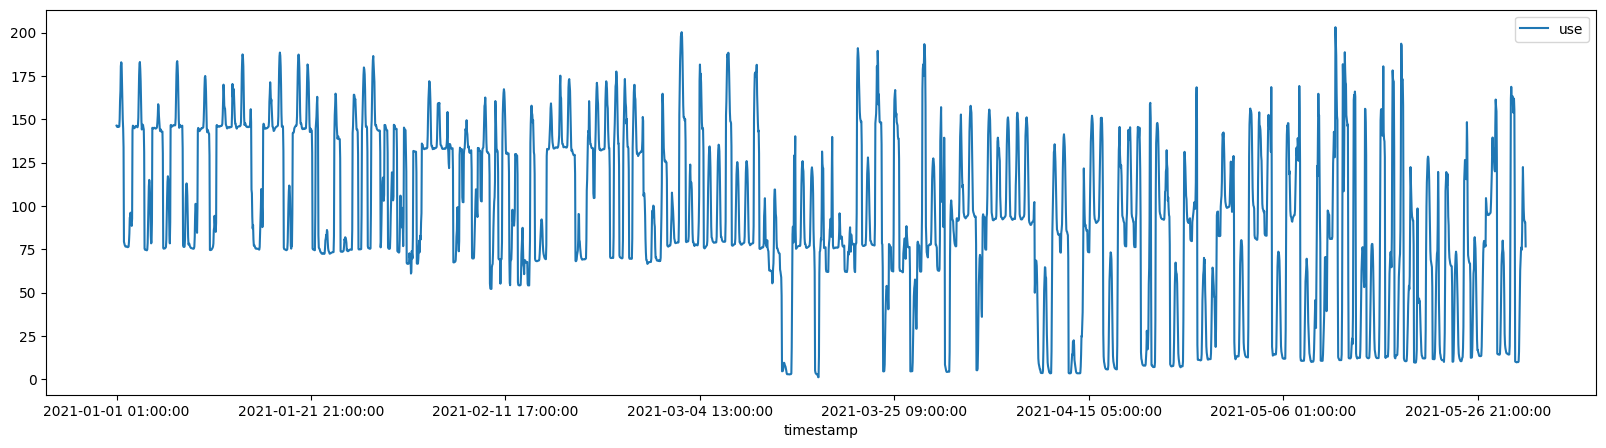

In [131]:
df_test.drop('anom', axis=1).plot(figsize=(20 ,5))
plt.scatter(x=df_, y=df_test['use'][anom_idx])

TypeError: PlotAccessor.scatter() missing 2 required positional arguments: 'x' and 'y'

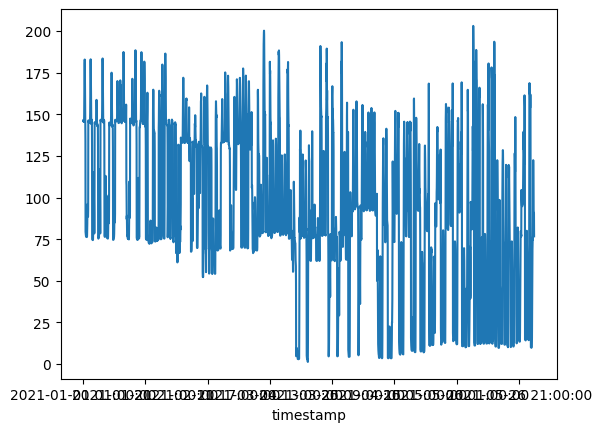

In [124]:
fig, ax = plt.subplots()
df_test.plot(ax=ax, legend=False)
df_sub.plot.scatter(ax=ax, legend=False, color='r')

In [60]:
np.where(anom)

(array([   0,    1,    2, ..., 3598, 3599, 3600]),
 array([11, 10,  9, ..., 17, 16, 15]))

In [61]:
anom = (keras.losses.mean_absolute_error(test, telpred) > threshold)
print(f'Num anom: {np.sum(anom)}')
print(f'Num anom: {np.where(anom)}')

Num anom: 4699
Num anom: (array([   0,    1,    2, ..., 3598, 3599, 3600]), array([11, 10,  9, ..., 17, 16, 15]))


In [54]:
np.where(keras.losses.mean_absolute_error(test, telpred)[num] > threshold, 1, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [64]:
anom_idx = []
for idx in range(24-1, len(test)-24+1):
    if np.all(anom[idx - 24 + 1: idx]):
        anom_idx.append(idx)

In [65]:
anom_idx

[]

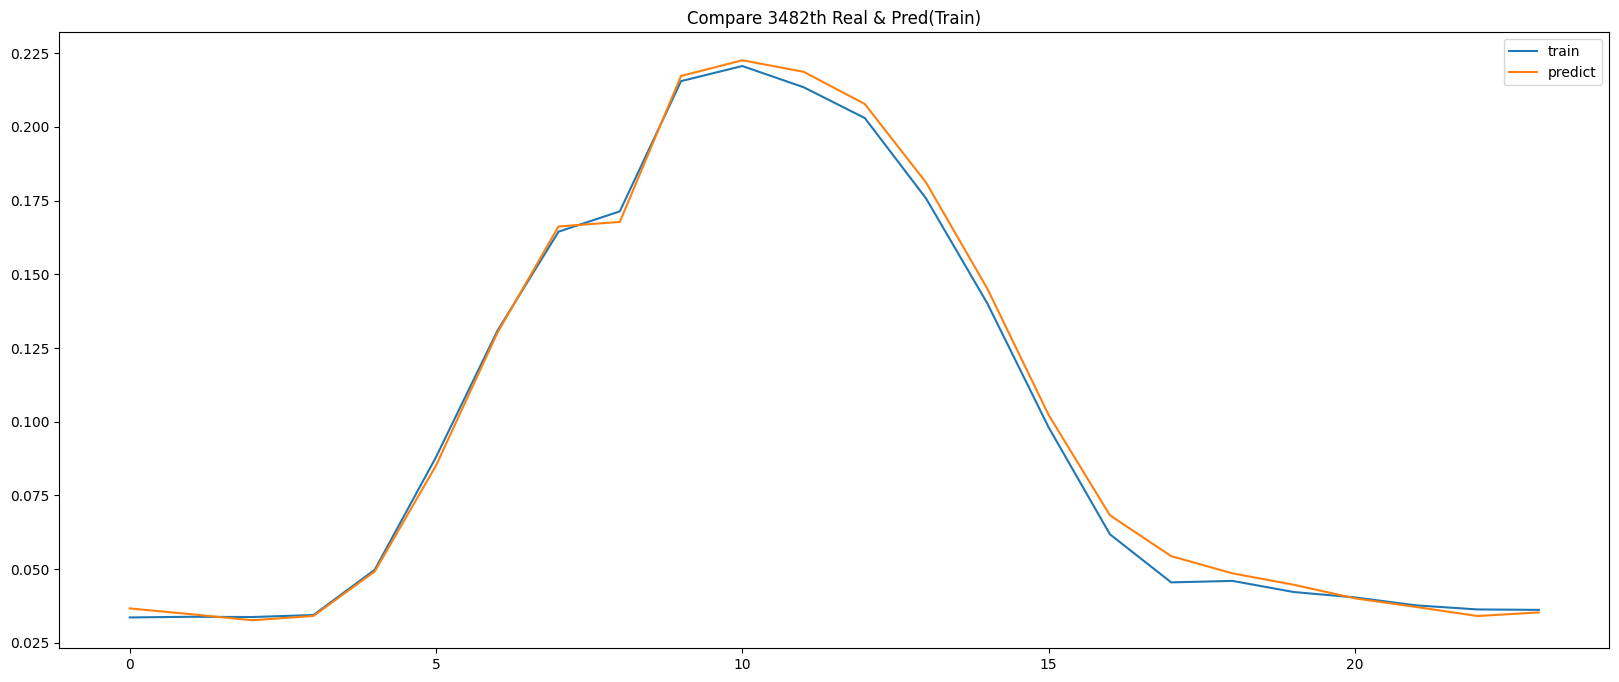

In [52]:
# model = lstm
import random

plt.figure(figsize=(20, 8))
num = random.randint(0, len(train))

plt.title(f'Compare {num}th Real & Pred(Train)')
plt.plot(test[num], label='train')
plt.plot(tetpred[num], label='predict')
plt.legend()
plt.show()